# import the basic libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import the dataset

In [87]:
df = pd.read_csv("train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Problem 1: Predicting CentralAir using SalePrice

a)

In [88]:
X = pd.DataFrame(df["SalePrice"])
y = pd.DataFrame(df["CentralAir"])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [89]:
dectree2 = DecisionTreeClassifier(max_depth = 2)
dectree4 = DecisionTreeClassifier(max_depth = 4)

In [90]:
dectree2.fit(X_train, y_train)
dectree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.8333333333333334, 'SalePrice <= 98150.0\ngini = 0.116\nsamples = 1168\nvalue = [72, 1096]\nclass = Y'),
 Text(0.25, 0.5, 'SalePrice <= 59250.0\ngini = 0.489\nsamples = 87\nvalue = [37, 50]\nclass = Y'),
 Text(0.125, 0.16666666666666666, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = N'),
 Text(0.375, 0.16666666666666666, 'gini = 0.463\nsamples = 77\nvalue = [28, 49]\nclass = Y'),
 Text(0.75, 0.5, 'SalePrice <= 137950.0\ngini = 0.063\nsamples = 1081\nvalue = [35, 1046]\nclass = Y'),
 Text(0.625, 0.16666666666666666, 'gini = 0.167\nsamples = 283\nvalue = [26, 257]\nclass = Y'),
 Text(0.875, 0.16666666666666666, 'gini = 0.022\nsamples = 798\nvalue = [9, 789]\nclass = Y')]

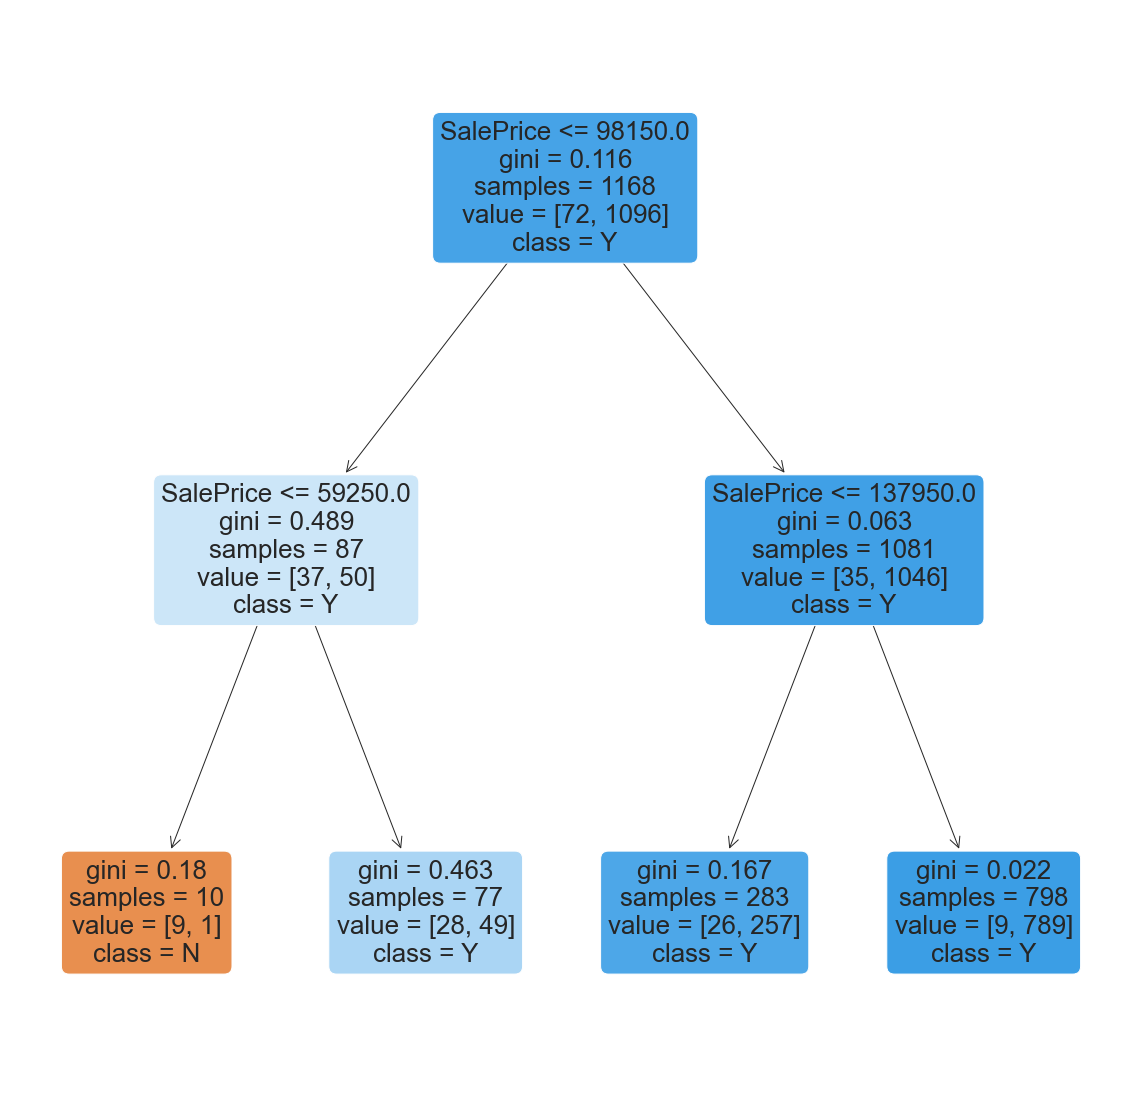

In [91]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree2, filled=True, rounded=True,
          feature_names=["SalePrice"],
          class_names=["N","Y"])

[Text(0.4625, 0.9, 'SalePrice <= 98150.0\ngini = 0.116\nsamples = 1168\nvalue = [72, 1096]\nclass = Y'),
 Text(0.25, 0.7, 'SalePrice <= 59250.0\ngini = 0.489\nsamples = 87\nvalue = [37, 50]\nclass = Y'),
 Text(0.15, 0.5, 'SalePrice <= 52250.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = N'),
 Text(0.1, 0.3, 'SalePrice <= 46000.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = N'),
 Text(0.05, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(0.15, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.35, 0.5, 'SalePrice <= 97500.0\ngini = 0.463\nsamples = 77\nvalue = [28, 49]\nclass = Y'),
 Text(0.3, 0.3, 'SalePrice <= 96750.0\ngini = 0.447\nsamples = 74\nvalue = [25, 49]\nclass = Y'),
 Text(0.25, 0.1, 'gini = 0.456\nsamples = 71\nvalue = [25, 46]\nclass = Y'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Y'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nval

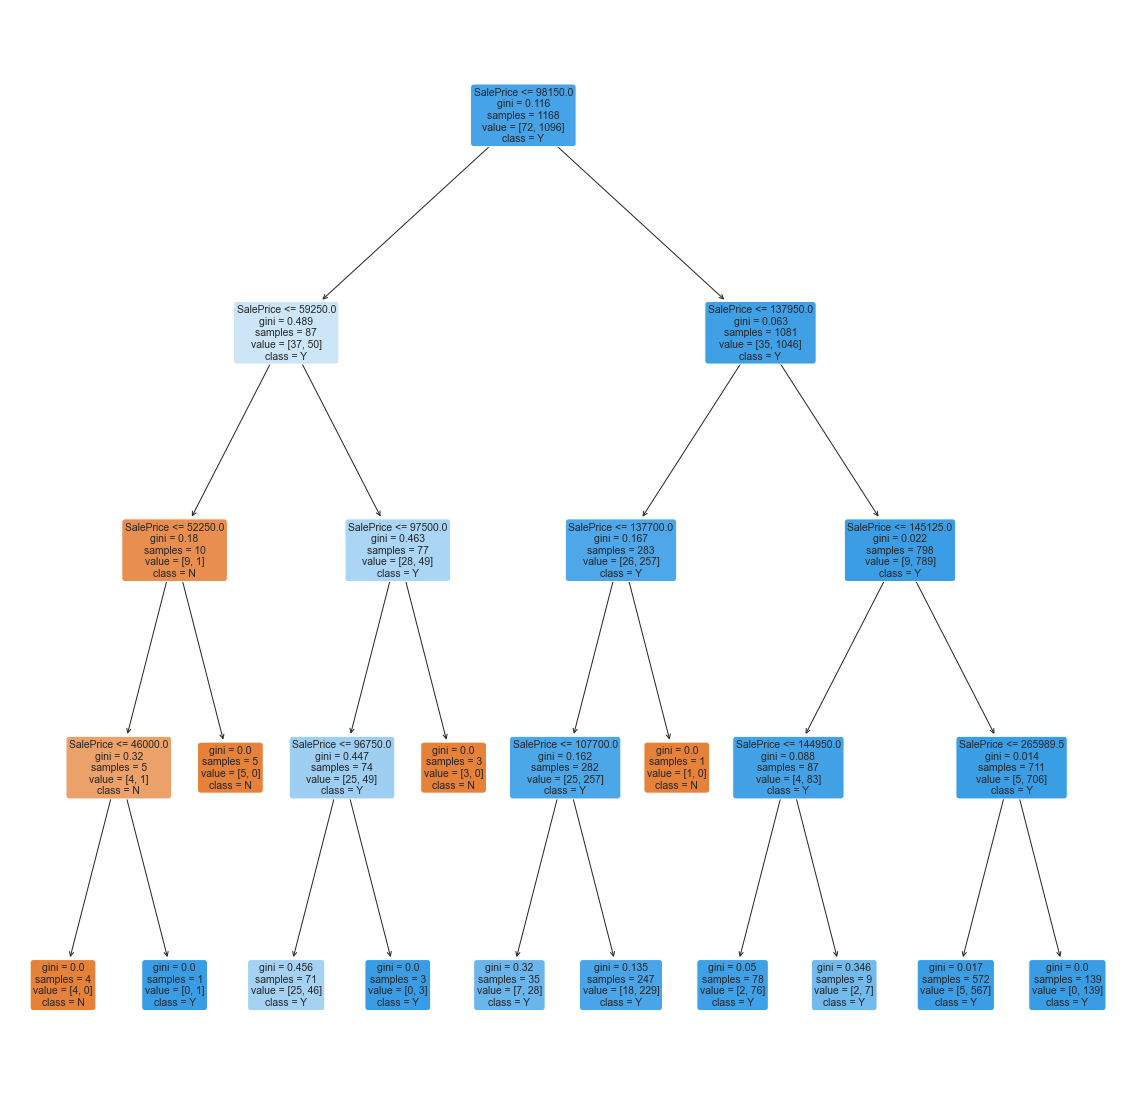

In [92]:
train_copy = pd.concat([X_train, y_train], axis = 1)
dectree4_copy = dectree4
f = plt.figure(figsize=(20,20))
plot_tree(dectree4, filled=True, rounded=True,
          feature_names=["SalePrice"],
          class_names=["N","Y"])

b)

Text(0.5, 1.0, 'Confusion Matrix on Test set for dectree4 \n Classification Accuracy : 0.9246575342465754\n TPR : 1.0\n FPR : 0.9565217391304348')

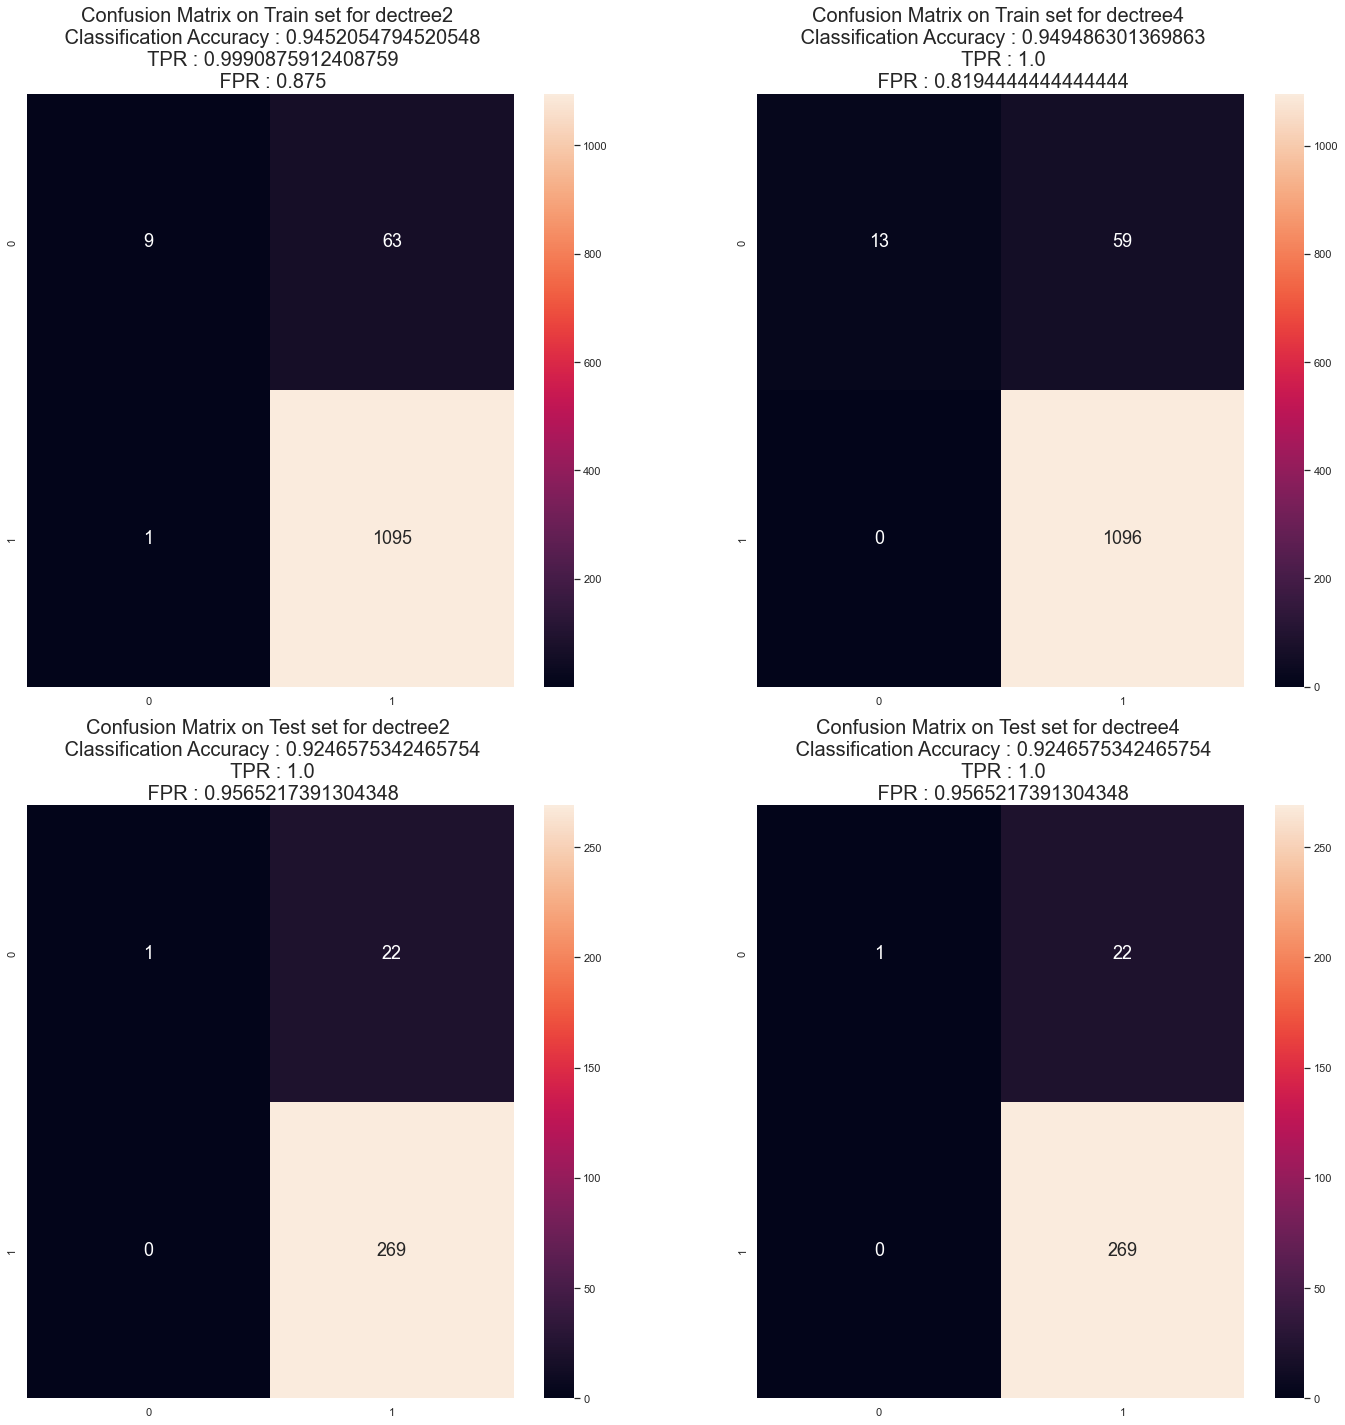

In [93]:
y_train_pred2 = dectree2.predict(X_train)
y_train_pred4 = dectree4.predict(X_train)
y_test_pred2 = dectree2.predict(X_test)
y_test_pred4 = dectree4.predict(X_test)

CA_train2 = dectree2.score(X_train, y_train)
CA_train4 = dectree4.score(X_train, y_train)
CA_test2 = dectree2.score(X_test, y_test)
CA_test4 = dectree4.score(X_test, y_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(2, 2, figsize=(24, 24))
cm = confusion_matrix(y_train, y_train_pred2)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0, 0])
TPR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[0][1] / (cm[0][0] + cm[0][1])
axes[0, 0].set_title("Confusion Matrix on Train set for dectree2 \n Classification Accuracy : {}\n TPR : {}\n FPR : {}".format(CA_train2, TPR, FPR), fontsize=20)

cm = confusion_matrix(y_train, y_train_pred4)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0, 1])
TPR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[0][1] / (cm[0][0] + cm[0][1])
axes[0, 1].set_title("Confusion Matrix on Train set for dectree4 \n Classification Accuracy : {}\n TPR : {}\n FPR : {}".format(CA_train4, TPR, FPR), fontsize=20)

cm = confusion_matrix(y_test, y_test_pred2)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1, 0])
TPR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[0][1] / (cm[0][0] + cm[0][1])
axes[1, 0].set_title("Confusion Matrix on Test set for dectree2 \n Classification Accuracy : {}\n TPR : {}\n FPR : {}".format(CA_test2, TPR, FPR), fontsize=20)

cm = confusion_matrix(y_test, y_test_pred4)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1, 1])
TPR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[0][1] / (cm[0][0] + cm[0][1])
axes[1, 1].set_title("Confusion Matrix on Test set for dectree4 \n Classification Accuracy : {}\n TPR : {}\n FPR : {}".format(CA_test4, TPR, FPR), fontsize=20)

# Problem 2: Predicting CentralAir Using other variables

In [94]:
# check the datatype of the variables
print(df['OverallQual'].dtype)
print(df['YearBuilt'].dtype)

int64
int64


part a) evaluating OverallQual

[Text(0.4230769230769231, 0.9, 'OverallQual <= 4.5\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass = N'),
 Text(0.23076923076923078, 0.7, 'OverallQual <= 3.5\ngini = 0.423\nsamples = 112\nvalue = [34, 78]\nclass = N'),
 Text(0.15384615384615385, 0.5, 'OverallQual <= 2.5\ngini = 0.472\nsamples = 21\nvalue = [13, 8]\nclass = Y'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Y'),
 Text(0.23076923076923078, 0.3, 'gini = 0.498\nsamples = 17\nvalue = [9, 8]\nclass = Y'),
 Text(0.3076923076923077, 0.5, 'gini = 0.355\nsamples = 91\nvalue = [21, 70]\nclass = N'),
 Text(0.6153846153846154, 0.7, 'OverallQual <= 6.5\ngini = 0.08\nsamples = 1056\nvalue = [44, 1012]\nclass = N'),
 Text(0.46153846153846156, 0.5, 'OverallQual <= 5.5\ngini = 0.119\nsamples = 615\nvalue = [39, 576]\nclass = N'),
 Text(0.38461538461538464, 0.3, 'gini = 0.147\nsamples = 313\nvalue = [25, 288]\nclass = N'),
 Text(0.5384615384615384, 0.3, 'gini = 0.088\nsamples = 302\nvalue = [1

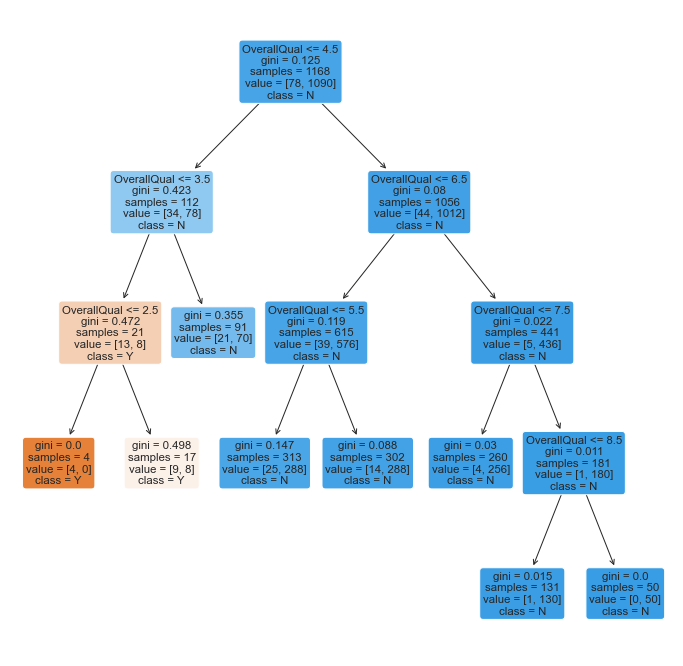

In [95]:
# Recall the Dataset
centralAir = pd.DataFrame(df['CentralAir'])   # Response
overallQual = pd.DataFrame(df['OverallQual'])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(overallQual, centralAir, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the decision tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["OverallQual"],
          class_names=["Y", "N"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9375

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9486301369863014



Text(0.5, 1.0, 'Test set for dectree4 \n Classification Accuracy : 0.9375 \n TPR : 0.9963636363636363 \n FPR : 1.0')

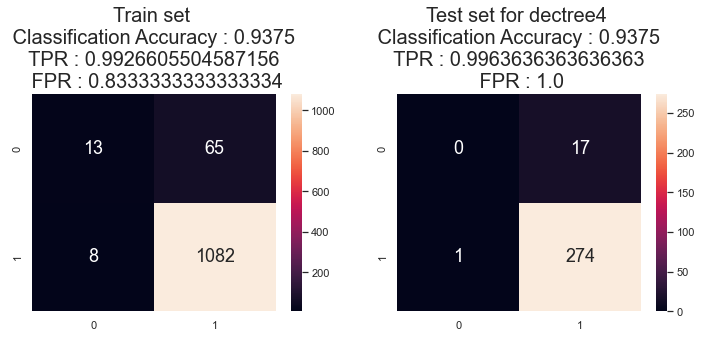

In [98]:
# Predict CentralAir values corresponding to OverallQual
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

CA_train = dectree.score(X_train, y_train)
CA_test = dectree.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

cm = confusion_matrix(y_train, y_train_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
TPR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[0][1] / (cm[0][0] + cm[0][1])
axes[0].set_title("Train set \n Classification Accuracy : {} \n TPR : {} \n FPR : {}".format(CA_train, TPR, FPR), fontsize=20)

cm = confusion_matrix(y_test, y_test_pred4)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
TPR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[0][1] / (cm[0][0] + cm[0][1])
axes[1].set_title("Test set for dectree4 \n Classification Accuracy : {} \n TPR : {} \n FPR : {}".format(CA_train, TPR, FPR), fontsize=20)

part b) evaluating YearBuilt

[Text(0.5340909090909091, 0.9, 'YearBuilt <= 1952.5\ngini = 0.126\nsamples = 1168\nvalue = [79, 1089]\nclass = N'),
 Text(0.25, 0.7, 'YearBuilt <= 1917.0\ngini = 0.373\nsamples = 282\nvalue = [70, 212]\nclass = N'),
 Text(0.09090909090909091, 0.5, 'YearBuilt <= 1877.5\ngini = 0.49\nsamples = 65\nvalue = [28, 37]\nclass = N'),
 Text(0.045454545454545456, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Y'),
 Text(0.13636363636363635, 0.3, 'YearBuilt <= 1891.0\ngini = 0.485\nsamples = 63\nvalue = [26, 37]\nclass = N'),
 Text(0.09090909090909091, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = N'),
 Text(0.18181818181818182, 0.1, 'gini = 0.494\nsamples = 56\nvalue = [25, 31]\nclass = N'),
 Text(0.4090909090909091, 0.5, 'YearBuilt <= 1948.5\ngini = 0.312\nsamples = 217\nvalue = [42, 175]\nclass = N'),
 Text(0.3181818181818182, 0.3, 'YearBuilt <= 1926.5\ngini = 0.283\nsamples = 182\nvalue = [31, 151]\nclass = N'),
 Text(0.2727272727272727, 0.1, 'gini = 0.372\nsamples = 77\nva

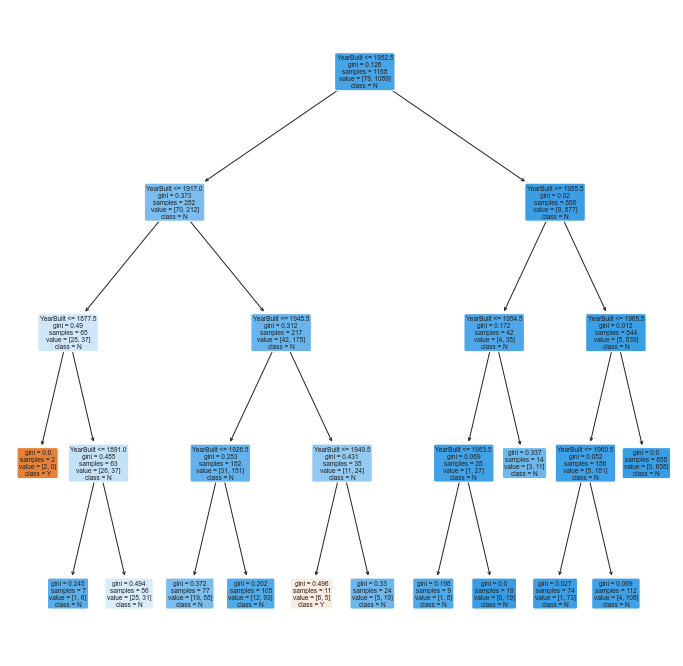

In [99]:
# Recall the Dataset
centralAir = pd.DataFrame(df['CentralAir'])   # Response
yearBuilt = pd.DataFrame(df['YearBuilt'])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(yearBuilt, centralAir, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the decision tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["YearBuilt"],
          class_names=["Y", "N"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.934931506849315

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9417808219178082



Text(0.5, 1.0, 'Test set for dectree4 \n Classification Accuracy : 0.934931506849315 \n TPR : 0.9963768115942029 \n FPR : 1.0')

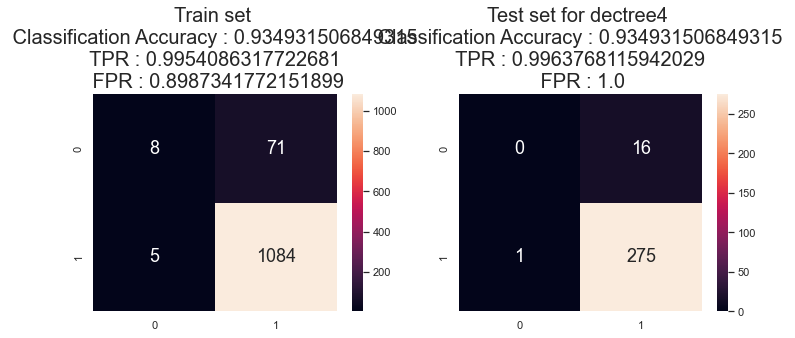

In [100]:
# Predict CentralAir values corresponding to OverallQual
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

CA_train = dectree.score(X_train, y_train)
CA_test = dectree.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

cm = confusion_matrix(y_train, y_train_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
TPR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[0][1] / (cm[0][0] + cm[0][1])
axes[0].set_title("Train set \n Classification Accuracy : {} \n TPR : {} \n FPR : {}".format(CA_train, TPR, FPR), fontsize=20)

cm = confusion_matrix(y_test, y_test_pred4)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
TPR = cm[1][1] / (cm[1][0] + cm[1][1])
FPR = cm[0][1] / (cm[0][0] + cm[0][1])
axes[1].set_title("Test set for dectree4 \n Classification Accuracy : {} \n TPR : {} \n FPR : {}".format(CA_train, TPR, FPR), fontsize=20)


Overall, YearBuilt is better, as it has higher TPR

# Problem 3: Understanding the Misclassified Samples

[Text(0.5267857142857143, 0.9, 'SalePrice <= 107700.0\ngini = 0.122\nsamples = 1168\nvalue = [76, 1092]\nclass = N'),
 Text(0.2857142857142857, 0.7, 'SalePrice <= 74000.0\ngini = 0.46\nsamples = 131\nvalue = [47, 84]\nclass = N'),
 Text(0.14285714285714285, 0.5, 'SalePrice <= 61691.5\ngini = 0.363\nsamples = 21\nvalue = [16, 5]\nclass = Y'),
 Text(0.07142857142857142, 0.3, 'SalePrice <= 46000.0\ngini = 0.245\nsamples = 14\nvalue = [12, 2]\nclass = Y'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Y'),
 Text(0.10714285714285714, 0.1, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = Y'),
 Text(0.21428571428571427, 0.3, 'SalePrice <= 67750.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = Y'),
 Text(0.17857142857142858, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = N'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Y'),
 Text(0.42857142857142855, 0.5, 'SalePrice <= 106125.0\ngini = 0.405\nsamples = 110\nvalue = [31

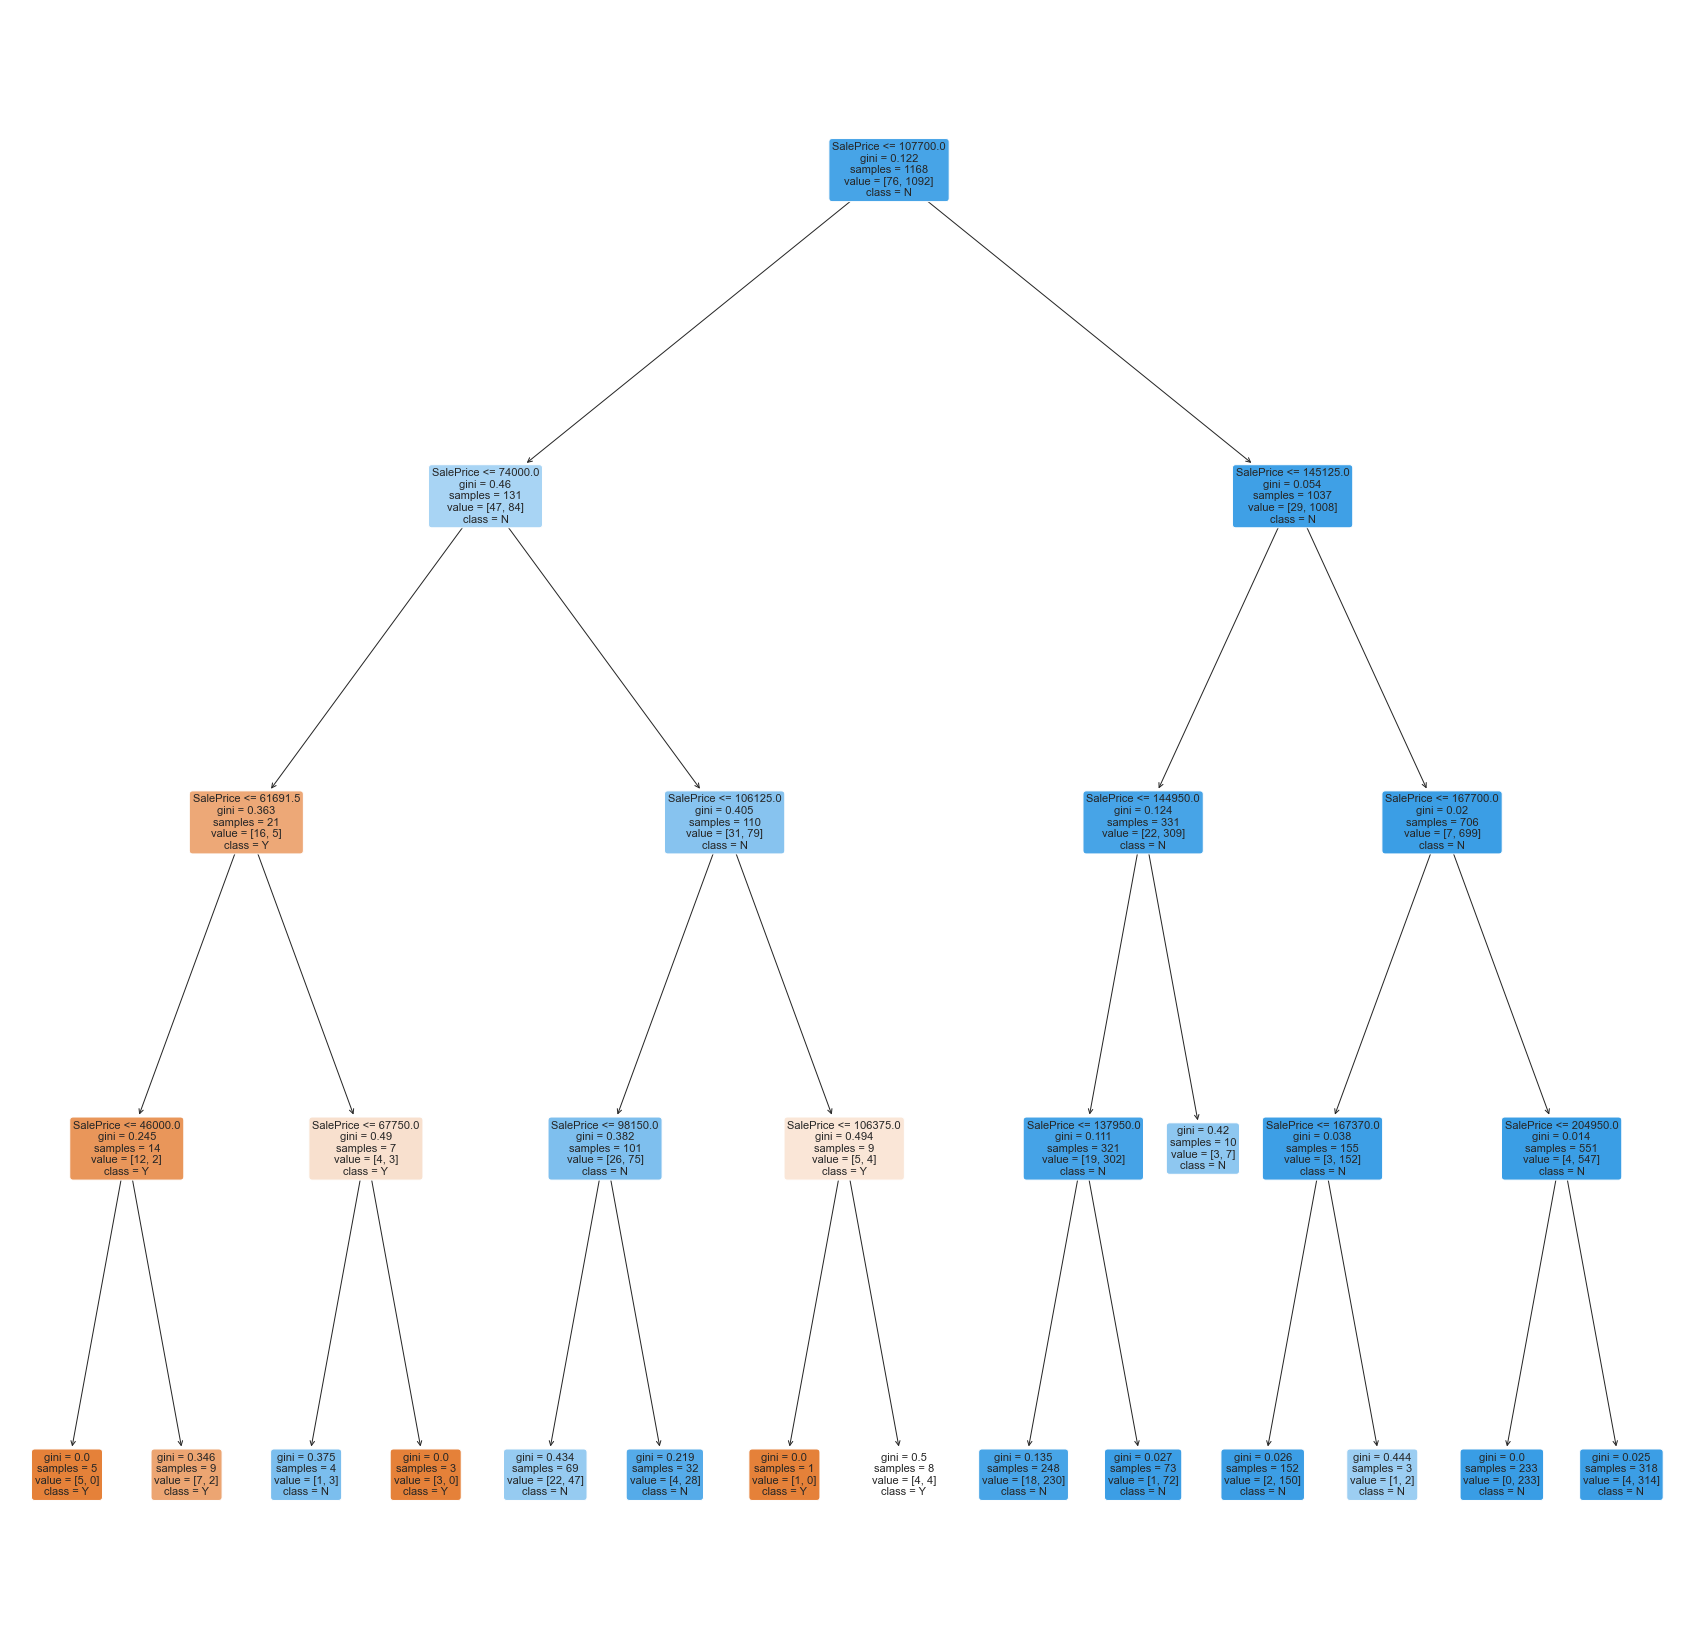

In [103]:
# Print the Classified Tree from Question 1a) again
# Recall the Dataset
centralAir = pd.DataFrame(df['CentralAir'])   # Response
salePrice = pd.DataFrame(df['SalePrice'])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(salePrice, centralAir, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the decision tree
f = plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["SalePrice"],
          class_names=["Y", "N"])

By observation, SalePrice greater than 106375.0 and less than 137950.0 will contribute the greatest False Positive.

In [106]:
# extract all the sample from train dataset
dataframe = pd.concat([X_train, y_train], axis=1)
dataframe
extracted = dataframe.loc[(dataframe['SalePrice'] > 106375.0) & (dataframe['SalePrice'] <= 107700.0)]
extracted

,SalePrice,CentralAir
1206,107000,Y
535,107500,Y
532,107500,Y
896,106500,N
1292,107500,N
74,107400,N
217,107000,N
392,106500,Y


In [107]:
false_pos = extracted.loc[extracted['CentralAir'] == 'N']
false_pos

,SalePrice,CentralAir
896,106500,N
1292,107500,N
74,107400,N
217,107000,N
